In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

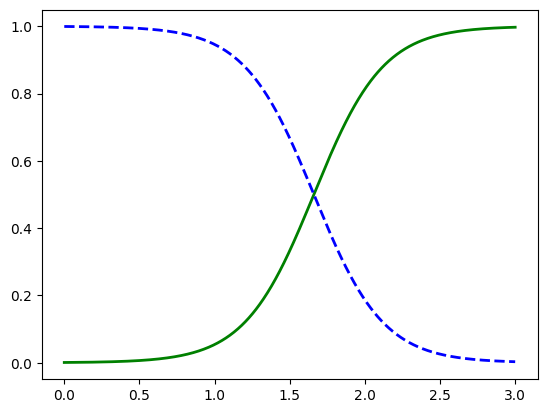

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

# Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

X = iris["data"][:, 3:]  # 3: petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

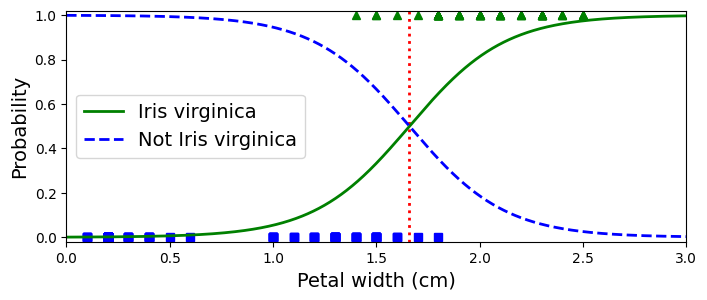

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "r:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Softmax Regression

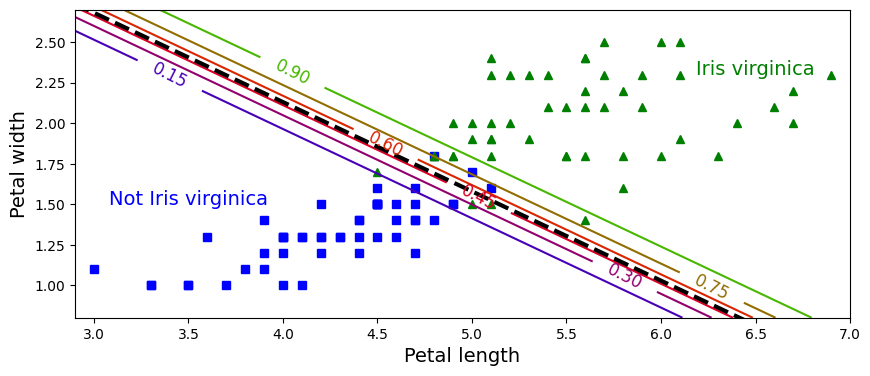

In [24]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [31]:
X[:,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

## Understanding Meshgrid

In [32]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [36]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [37]:
x

array([0. , 0.5, 1. ])

In [38]:
y

array([0., 1.])

# Meshgrid from code

In [39]:
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

In [40]:
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [41]:
X_new.shape

(100000, 2)

# Display data

In [8]:
iris = datasets.load_iris(as_frame = True)

iris['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris['target'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

# Working on Theory of Logit

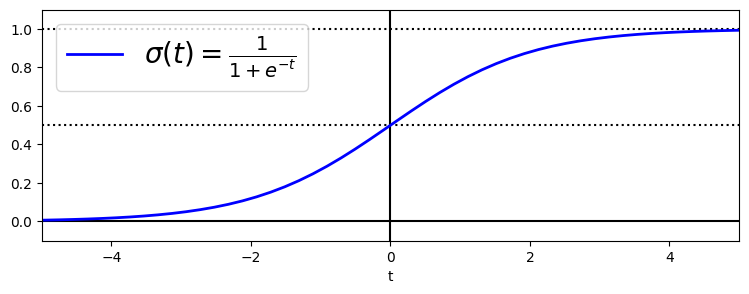

In [12]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [0.5, 0.5], "k:")
plt.plot([-5, 5], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()


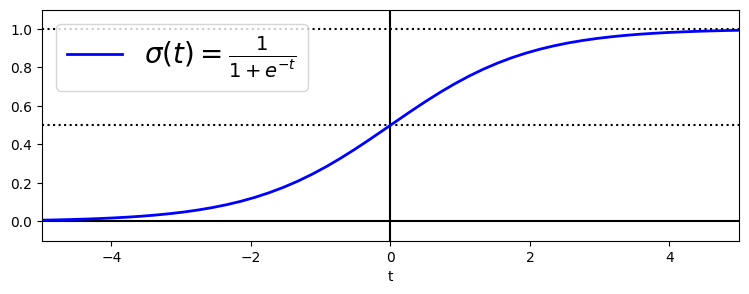

In [27]:
x = np.linspace(-5,5,50)
beta_0 = 0
beta_1 = 1
term = np.exp(beta_0 + beta_1*x)

sig = term / (1 + term)
plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [0.5, 0.5], "k:")
plt.plot([-5, 5], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

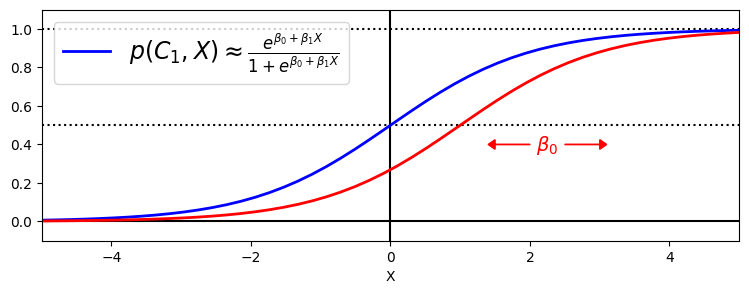

In [99]:
x = np.linspace(-5,5,50)
beta_0 = 0
beta_1 = 1
term = np.exp(beta_0 + beta_1*x)

sig = term / (1 + term)
fig = plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [0.5, 0.5], "k:")
plt.plot([-5, 5], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$p(C_1, X) \approx \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$")
plt.xlabel("X")
plt.legend(loc="upper left", fontsize=17)
plt.axis([-5, 5, -0.1, 1.1])

beta_0 = -1
beta_1 = 1
term = np.exp(beta_0 + beta_1*x)
sig = term / (1 + term)
plt.plot(x, sig, "r-", linewidth=2)

plt.text(2.25, 0.37, r"$\beta_0$", fontsize=14, color="r", ha="center")
plt.arrow(2, 0.4, -0.5, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(2.5, 0.4, 0.5, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')

plt.show(fig)

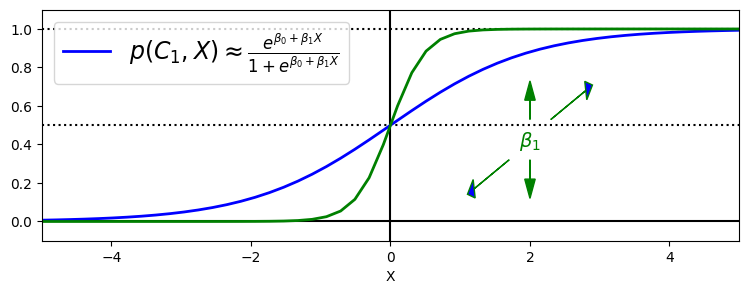

In [100]:
x = np.linspace(-5,5,50)
beta_0 = 0
beta_1 = 1
term = np.exp(beta_0 + beta_1*x)

sig = term / (1 + term)
fig = plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [0.5, 0.5], "k:")
plt.plot([-5, 5], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$p(C_1, X) \approx \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$")
plt.xlabel("X")
plt.legend(loc="upper left", fontsize=17)
plt.axis([-5, 5, -0.1, 1.1])

beta_0 = 0
beta_1 = 4.0
term = np.exp(beta_0 + beta_1*x)
sig = term / (1 + term)
plt.plot(x, sig, "g-", linewidth=2)

plt.text(2, 0.39, r"$\beta_1$", fontsize=14, color="g", ha="center")
plt.arrow(2, 0.53, 0, 0.1, head_width=0.15, head_length=0.1, fc='g', ec='g')
plt.arrow(2, 0.32, 0, -0.1, head_width=0.15, head_length=0.1, fc='g', ec='g')

plt.arrow(2.3, 0.53, 0.5, 0.15, head_width=0.1, head_length=0.1, fc='b', ec='g')
plt.arrow(1.7, 0.32, -0.5, -0.15, head_width=0.1, head_length=0.1, fc='b', ec='g')

plt.show(fig)

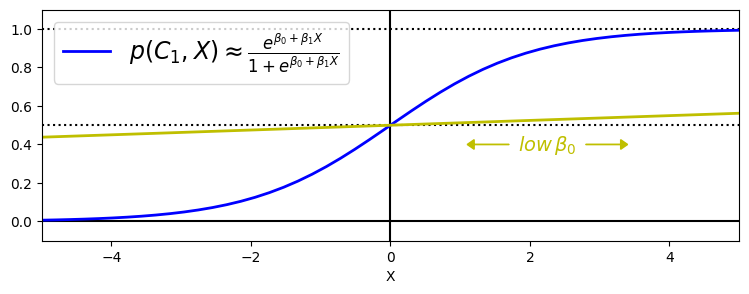

In [98]:
x = np.linspace(-5,5,50)
beta_0 = 0
beta_1 = 1
term = np.exp(beta_0 + beta_1*x)

sig = term / (1 + term)
fig = plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [0.5, 0.5], "k:")
plt.plot([-5, 5], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(x, sig, "b-", linewidth=2, label=r"$p(C_1, X) \approx \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$")
plt.xlabel("X")
plt.legend(loc="upper left", fontsize=17)
plt.axis([-5, 5, -0.1, 1.1])

beta_0 = 0
beta_1 = 0.05
term = np.exp(beta_0 + beta_1*x)
sig = term / (1 + term)
plt.plot(x, sig, "y-", linewidth=2)

plt.text(2.25, 0.37, r"$low \, \beta_0$", fontsize=14, color="y", ha="center")
plt.arrow(1.7, 0.4, -0.5, 0, head_width=0.05, head_length=0.1, fc='y', ec='y')
plt.arrow(2.8, 0.4, 0.5, 0, head_width=0.05, head_length=0.1, fc='y', ec='y')

plt.show(fig)